# Time Series Project

#### Meng Lin, Hannah Lyon, Kyrill Rekun, Qingyi Sun

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.impute import SimpleImputer
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [51]:
df = pd.read_csv('zillow-california.csv', squeeze=True)
df.columns = ['Date','Median_Sold_Price','Median_Mortgage','Unemployment','Median_Rental_Price']
df = df.reset_index()
df.drop(['Date'], axis=1, inplace=True)
df.head()

,index,Median_Sold_Price,Median_Mortgage,Unemployment,Median_Rental_Price
0,0,326752.55,5.02,7.9,NaN
1,1,329501.50,4.94,7.8,NaN
2,2,340125.45,4.74,7.8,NaN
3,3,355329.50,5.16,7.5,NaN
4,4,367818.15,5.64,7.3,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
index                  164 non-null int64
Median_Sold_Price      144 non-null float64
Median_Mortgage        164 non-null float64
Unemployment           164 non-null float64
Median_Rental_Price    92 non-null float64
dtypes: float64(4), int64(1)
memory usage: 6.5 KB


In [53]:
x = df['Median_Sold_Price'].loc[(df['Median_Sold_Price'].notna())]
x = pd.DataFrame(x)

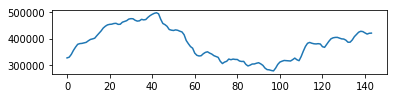

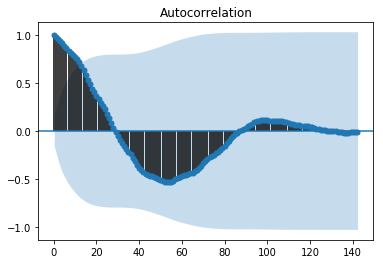

/Users/hannahlyon/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


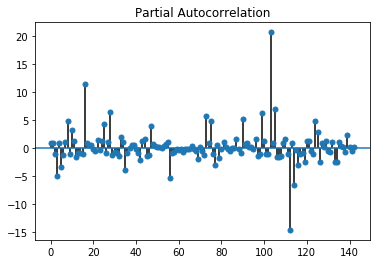

In [54]:
# draw plots
plt.subplot(3,1,1)
plt.plot(x) 
plt.show()
plot_acf(x, lags = 142) 
plt.show()
plot_pacf(x, lags = 142) 
plt.show()

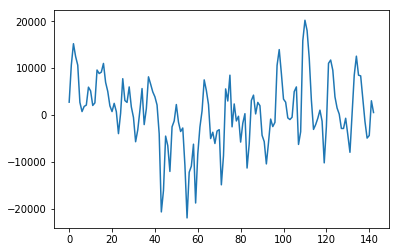

In [55]:
# try one time differencing
li_x = x.values
d1 = list()
for i in range(1, len(li_x)):
    value = li_x[i] - li_x[i - 1]
    d1.append(float(value))
    
plt.plot(d1) 


In [56]:
# ADF TEST for d = 1

from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(d1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.687305
p-value                          0.437665
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


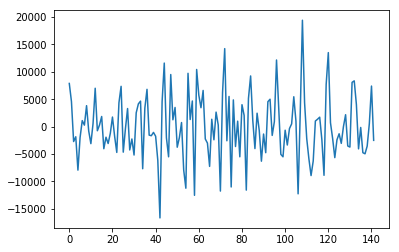

In [57]:
d2 = list()
for i in range(1, len(d1)):
    value = d1[i] - d1[i - 1]
    d2.append(value)

plt.plot(d2)

In [58]:
# ADF for d = 2
adf_test(d2)

Results of Dickey-Fuller Test:
Test Statistic                  -4.918846
p-value                          0.000032
#Lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


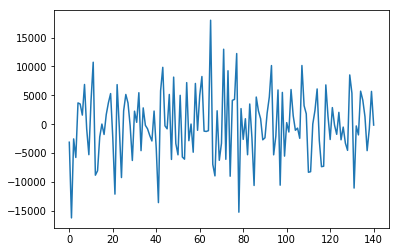

In [59]:
d3 = list()
for i in range(1, len(d2)):
    value = d2[i] - d2[i - 24]
    d3.append(value)

plt.plot(d3)

In [60]:
train_size = int(len(x) * 0.8)
train, test = df[0:train_size], df[train_size:]

In [61]:
model = pm.auto_arima(x, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=24,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.summary())

Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 1, 24); AIC=2369.963, BIC=2383.817, Fit time=4.487 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 24); AIC=2380.606, BIC=2386.147, Fit time=0.099 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 24); AIC=2384.332, BIC=2395.415, Fit time=0.608 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 24); AIC=2384.736, BIC=2395.819, Fit time=1.721 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 1, 24); AIC=2370.507, BIC=2387.131, Fit time=3.471 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 1, 0, 24); AIC=2367.614, BIC=2378.697, Fit time=0.621 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 0, 24); AIC=2382.738, BIC=2391.050, Fit time=0.108 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_order=(0, 1, 0, 24); AIC=2377.435, BIC=2391.288, Fit time=0.461 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 1, 0, 24); AIC=2382.333, BIC=2390.645, Fit time=0.091 seconds
Fit ARIMA: order=(1, 2, 2) s

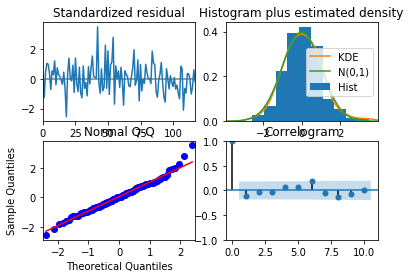

In [62]:
model.plot_diagnostics()
plt.show()

In [63]:
fitted = model.fit(train)
fc, conf = fitted.predict(len(test),return_conf_int=True,alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: bad input shape (115, 5)

In [18]:
model.predict(n_periods=n_periods)

array([413712.8168026 , 414921.35652036, 430247.35664342, 446759.5560203 ,
       461486.30230443, 470881.42686751, 478142.52566731, 484331.01170687,
       487668.47198081, 491183.98496273, 497037.14537397, 499516.60974908])

In [ ]:
model.plot_diagnostics()
plt.show()

In [ ]:
mse = ((fc_series - test) ** 2).mean()
rmse=round(np.sqrt(mse), 2)
print(rmse)

In [ ]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=24,damped=True)
model2 = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=24, damped=True)
fit = model.fit()
pred = fit.forecast(len(test))
fit2 = model2.fit()
pred2 = fit2.forecast(len(test))

In [ ]:
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(pred, label='additive forecast')
plt.plot(pred2, label='multiplicative forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
rmse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
rmse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))
print(rmse1)
print(rmse2)